In [ ]:
! sudo apt-get update
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-extra cm-super

In [2]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

Setting rcParams['ps.usedistiller'] to 'xpdf' requires xpdf.


In [3]:
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
masterdata = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/distribution/DistrIV/2022-01-11-15-51_DistrIV_scala/DistrIV_scala.csv")

In [6]:
masterdata.head()

,genId,noise,ref_dim,rep,value,contrast
0,independent_linear_stripe-ils-4-0.5-gaussian-0,0.5,0,3751,0.292018,0.629915
1,independent_linear_stripe-ils-4-0.5-gaussian-0,0.5,0,5001,0.656376,0.629915
2,independent_linear_stripe-ils-4-0.5-gaussian-0,0.5,0,6876,0.457083,0.629915
3,independent_linear_stripe-ils-4-0.5-gaussian-0,0.5,0,626,0.427476,0.629915
4,independent_linear_stripe-ils-4-0.5-gaussian-0,0.5,0,3752,0.456438,0.629915


In [7]:
%matplotlib inline

In [8]:
def get_values_of_dim(r):
  return (masterdata[(masterdata["ref_dim"] == r)])["value"].to_numpy()

In [35]:
def plot_hists():
  num_bins = 50
  f, axarr = plt.subplots(2,2, figsize=(14,8), sharex = True, sharey = True)
  f.suptitle(r"Distributions of iteration-value w.r.t. each reference dimension from $\mathcal{D}_4$", fontsize = 28, y = 1.03)
  axes = axarr.flatten()
  titles = ["1st dimension", "3rd dimension", "2nd dimension", "4th dimension"]
  for i in range(4):
    plt.sca(axes[i])
    data = get_values_of_dim(i)
    color = blues5[0] if i % 2 == 0 else reds5[0] 
    plt.hist(data, bins=num_bins, range=(0,1), density=False, stacked = True, 
                  color=color, alpha=0.6, linewidth=1, edgecolor="grey")
    plt.ylim(0, 1000)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    if i % 2 == 0:
      plt.ylabel("Frequency", fontsize = 25)
    if i > 1:
      plt.xlabel("iteration-value", fontsize = 25)
    plt.title(titles[i], fontsize = 28)
  plt.savefig("IV", bbox_inches='tight')

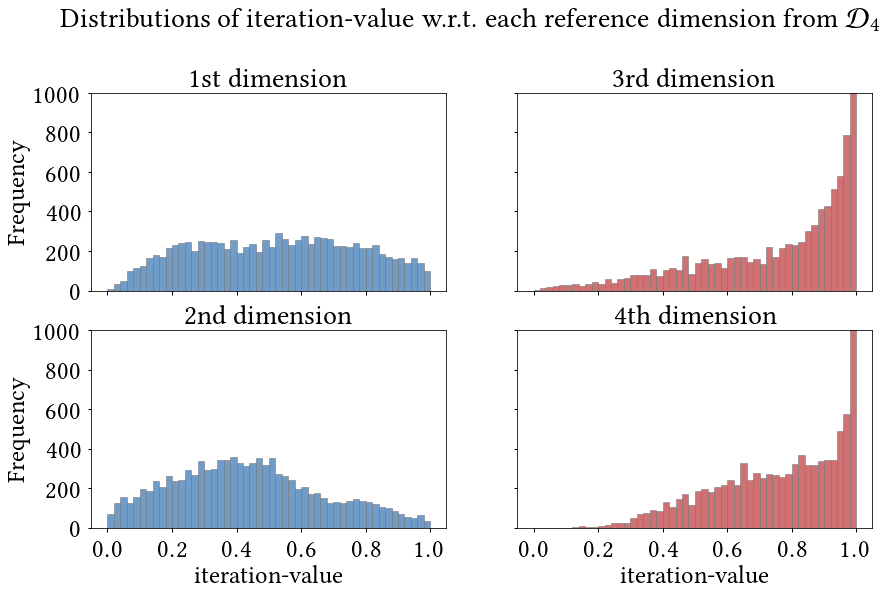

In [36]:
plot_hists()

In [15]:
data_img = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/distribution/DistrIV/2022-01-11-15-51_DistrIV_scala/image_scala.csv")

In [ ]:
data_img

,1,2,3,4
0,1.406583,0.113539,0.571953,0.139755
1,-0.024592,1.691734,0.057304,1.244709
2,0.253728,0.295640,-0.399467,-0.605397
3,0.437669,-0.353380,0.484480,0.728736
4,0.844268,1.041976,0.186327,0.512673
...,...,...,...,...
995,1.159653,-0.664353,0.030403,-0.211108
996,0.910444,1.123497,0.295672,1.207383
997,0.616537,0.730305,0.011850,0.110056
998,0.505027,0.519099,1.222709,-0.017794


In [ ]:
def get_dim(r):
  return data_img[str(r+1)].to_numpy()

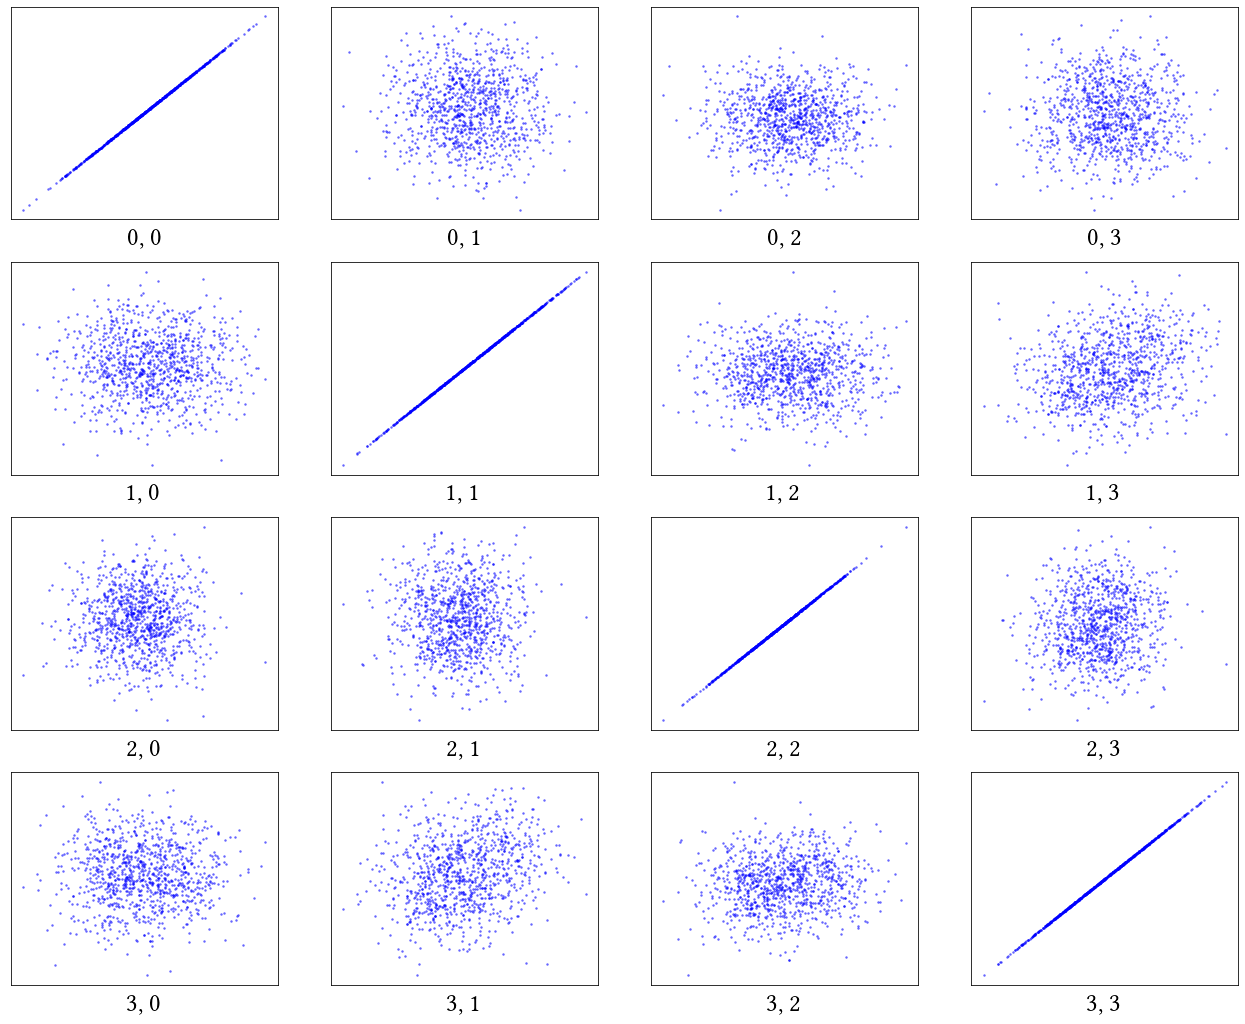

In [ ]:
f, axarr = plt.subplots(4,4, figsize=(22,18))
axes = axarr.flatten()

x = get_dim(0)
y = get_dim(1)
z = get_dim(2)
w = get_dim(3)

values = [x,y,z,w]

for i in range(4):
  for j in range(4):
    plt.sca(axes[4*i + j])
    xs = values[i]
    ys = values[j]
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.scatter(xs,ys , s = 4, c = "blue", alpha = 0.6)
    plt.title(f"{i}, {j}", y=-0.15)

